In [7]:
import numpy as np
import scipy as sp
import networkx as nx
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [12]:
from netevolution import *
from bct import community_louvain

x = GraphEvo(500, 0.05, np.array([3., 0., 5, 1]))
print(community_louvain(x.G)[1])

0.16572774767055365


In [13]:
for _ in tqdm_notebook(range(100000)):
    x.mc_step_edge(1)

(array([74., 42., 37., 28., 11., 13.,  8., 12.,  8., 13., 10.,  9.,  4.,
         4.,  7.,  1.,  1.,  7.,  4.,  5.,  1.,  6.,  2.,  5.,  4.,  4.,
         3.,  1.,  6.,  3.,  3.,  1.,  5.,  6.,  4.,  7.,  2.,  4.,  1.,
         4.,  5.,  3.,  6.,  4.,  2.,  3.,  4.,  2.,  2.,  1.,  2.,  1.,
         2.,  2.,  3.,  1.,  4.,  3.,  3.,  4.,  1.,  3.,  0.,  3.,  4.,
         4.,  3.,  3.,  3.,  0.,  2.,  4.,  2.,  0.,  2.,  1.,  5.,  3.,
         0.,  2.,  9.,  1.,  3.,  2.,  1.,  3.,  1.,  0.,  0.,  0.,  1.,
         0.,  1.,  2.,  1.,  0.,  1.,  0.,  1.,  1.]),
 array([  0.  ,   1.01,   2.02,   3.03,   4.04,   5.05,   6.06,   7.07,
          8.08,   9.09,  10.1 ,  11.11,  12.12,  13.13,  14.14,  15.15,
         16.16,  17.17,  18.18,  19.19,  20.2 ,  21.21,  22.22,  23.23,
         24.24,  25.25,  26.26,  27.27,  28.28,  29.29,  30.3 ,  31.31,
         32.32,  33.33,  34.34,  35.35,  36.36,  37.37,  38.38,  39.39,
         40.4 ,  41.41,  42.42,  43.43,  44.44,  45.45,  46.46,  47.47,
  

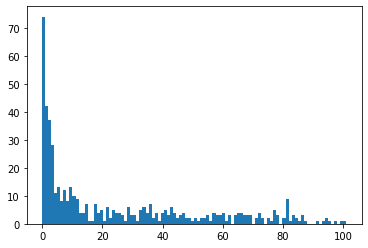

In [14]:
G = nx.from_numpy_array(x.G)
plt.hist(dict(G.degree()).values(), bins=100)

In [15]:
nx.density(G)

0.04904208416833667

1.3237227984041242
1.0
-144.54515675793078 1.9602422755790824e-28


Values less than or equal to 0 in data. Throwing out 0 or negative values
/usr/local/lib/python3.7/site-packages/powerlaw.py:697: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))


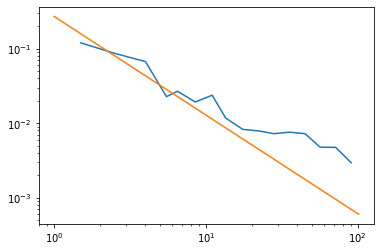

In [16]:
import powerlaw
results = powerlaw.Fit(list(dict(G.degree()).values()), 
                       discrete=True, xmin=1)
print(results.power_law.alpha)
print(results.power_law.xmin)
R, p = results.distribution_compare('power_law', 'lognormal')
print(R, p)
results.plot_pdf()
results.power_law.plot_pdf()

In [ ]:
community_louvain.

In [361]:
from bct import community_louvain
print(community_louvain(x.G)[1])

In [363]:
res[1]

0.12790196636676304

/usr/local/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


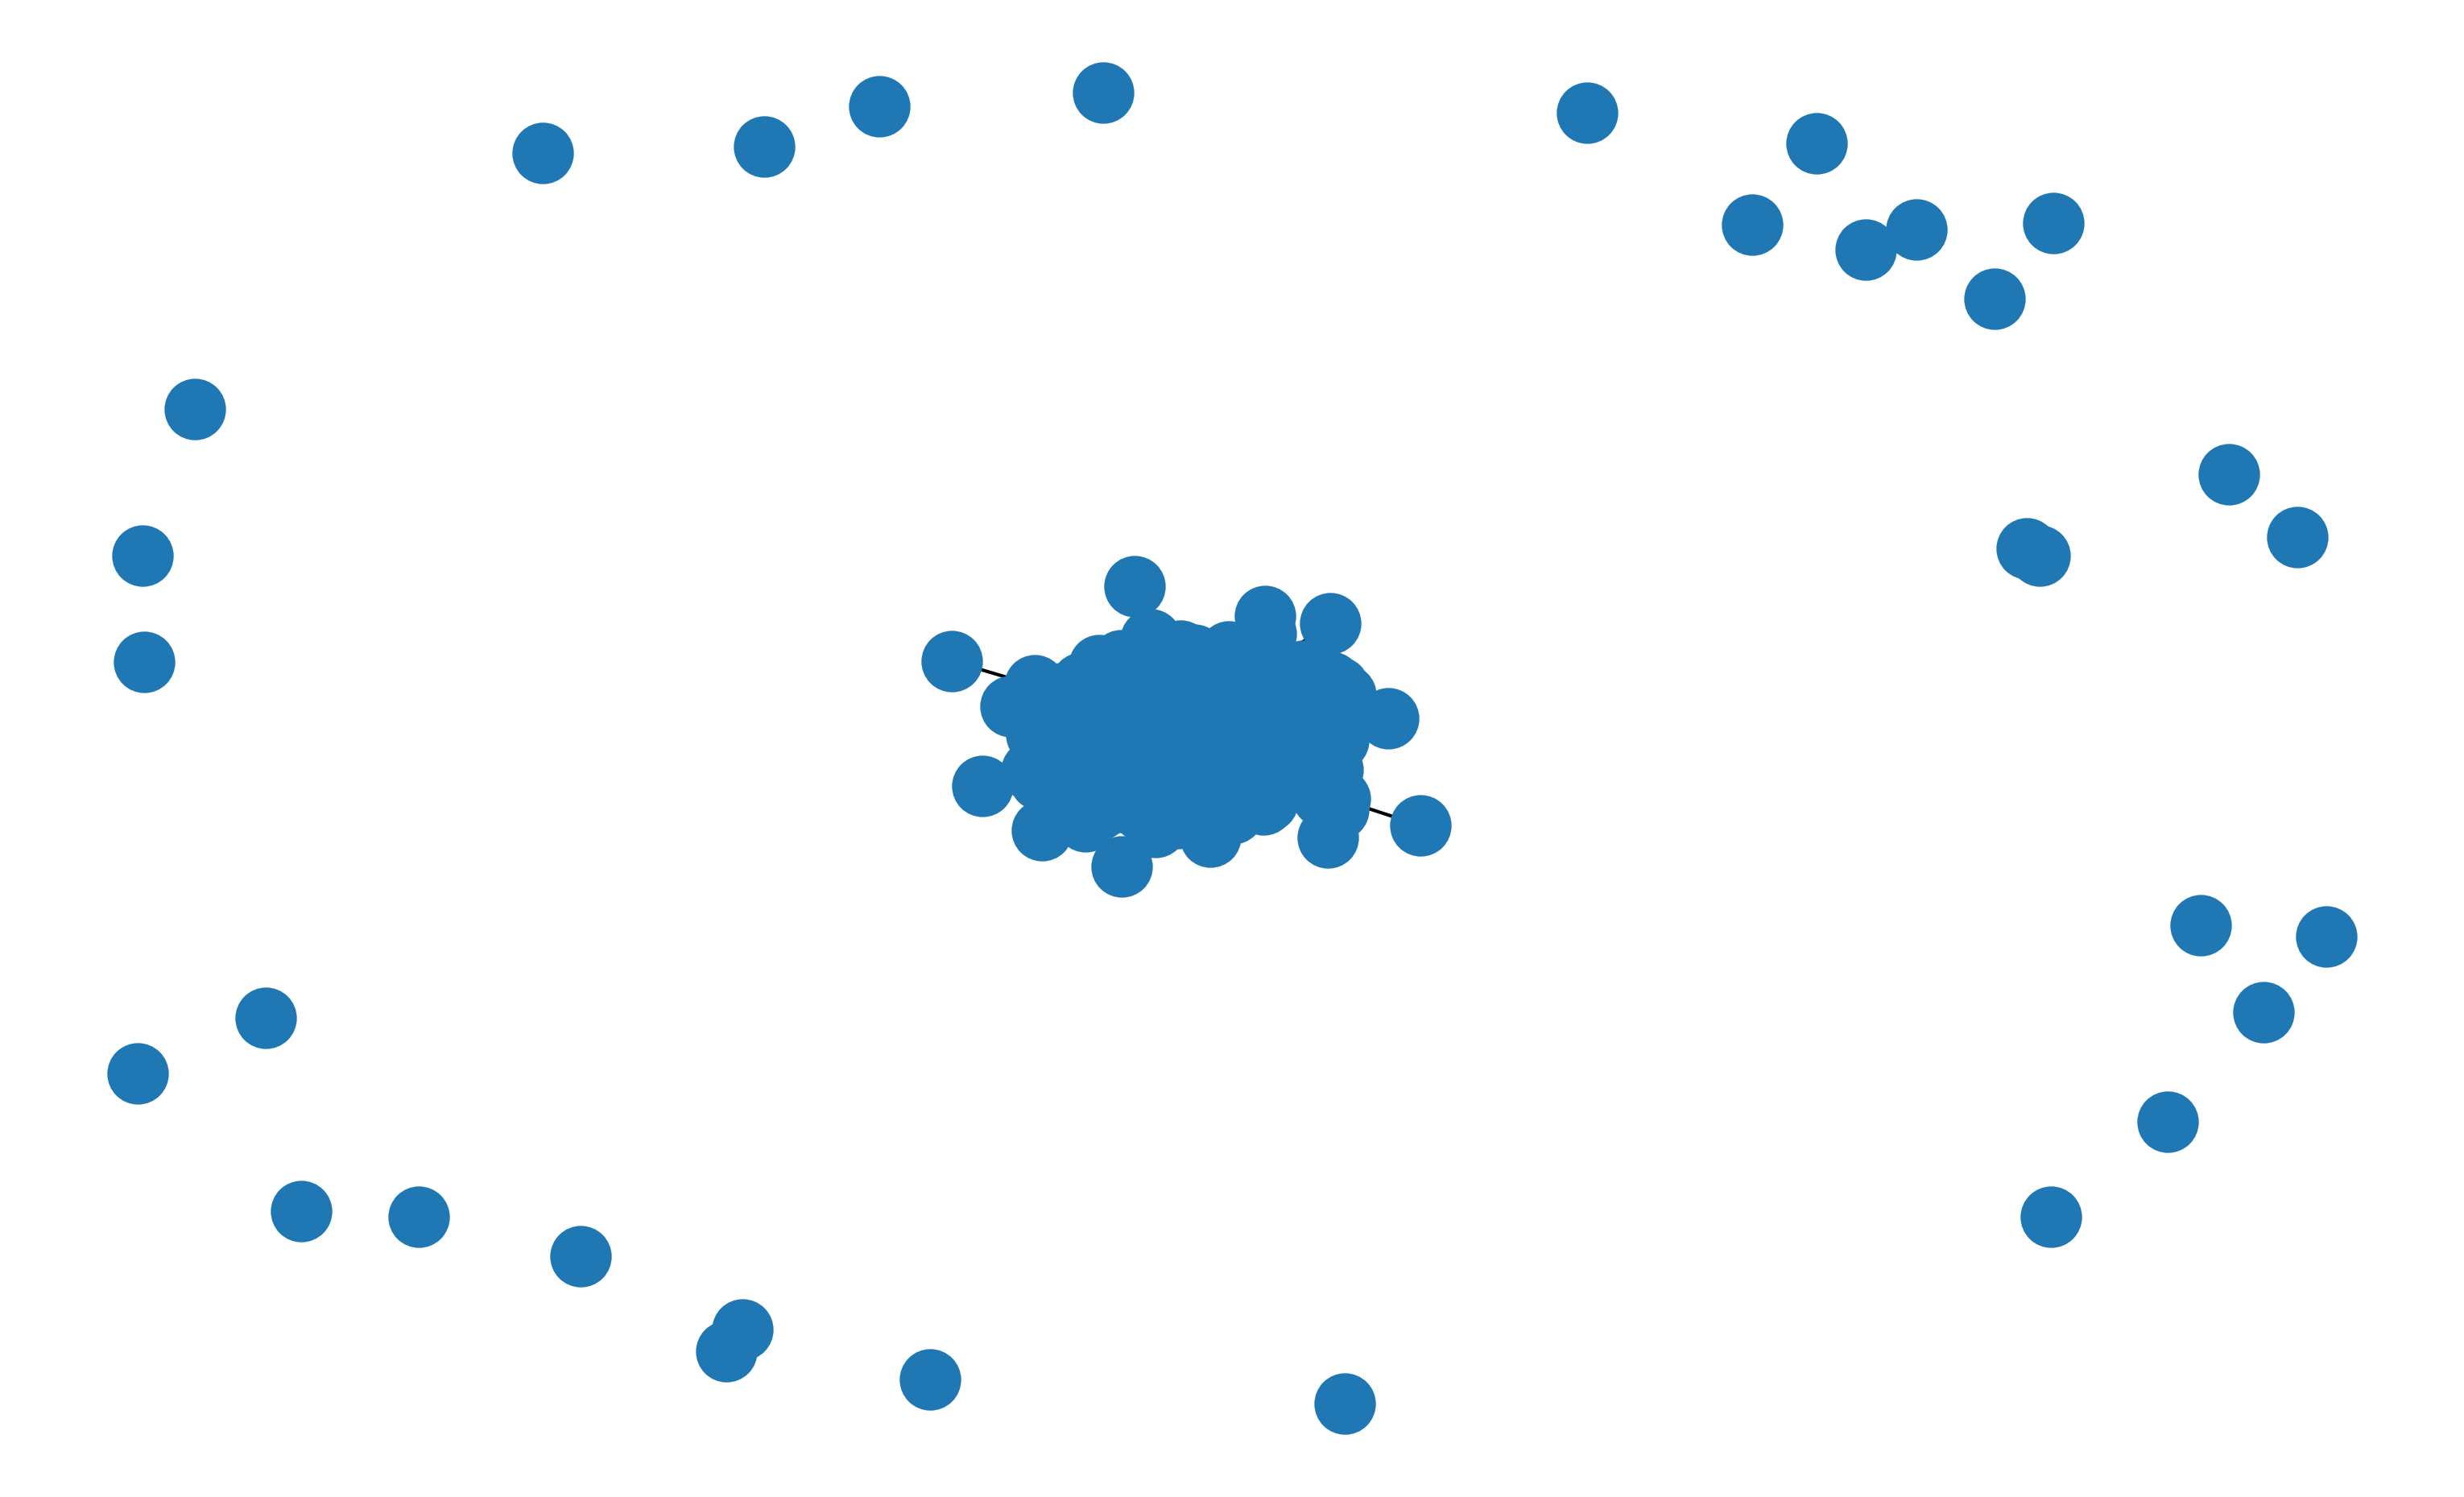

In [351]:
plt.figure(figsize=(10, 6), dpi=300)
nx.draw(G)